In [17]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
loaded_model = load_model("trained_model.h5")

In [18]:
import numpy as np
X_new_padded = np.load("my_array.npy")
data = np.load("data.npy")

In [19]:
import joblib
scaler = joblib.load('scaler.pkl')

In [20]:
X_new_padded[1007].shape
X_trial = np.expand_dims(X_new_padded[1007],axis=0)
print(X_trial.shape)

(1, 1008, 1)


In [21]:
predictions = []
temp = X_trial
for i in range(0,10):
    y_pred = loaded_model.predict(temp)
    predictions.append(y_pred[0][0])
    temp[0] = (np.append(temp[0][1:], y_pred[0][0])).reshape(1008,1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [22]:
predictions = np.array(predictions)
print(predictions.shape)

(10,)


In [23]:
predictions = scaler.inverse_transform(predictions.reshape(1,-1))
print(predictions)

[[400.35458 398.47467 396.8532  395.43552 394.18393 393.0709  392.07532
  391.18045 390.37238 389.63934]]


In [24]:
data = data.reshape(1009)

In [25]:
data = np.append(data, predictions[0])
data = data[700:]
print(data.shape)

(319,)


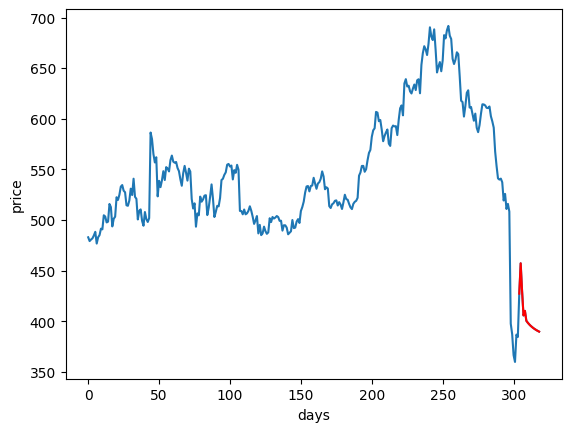

In [26]:
plt.plot(data)
plt.plot(range(len(data)-15, len(data)), data[-15:], color='red')
plt.xlabel('days')
plt.ylabel('price')
plt.show()